# 1. Imports 

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# constants
#path = 'C:/Users/monte/Documents/Memoria/src'
path = 'C:/Users/asus/Documents/2023_2/Memoria/src'

# Ostar
O_df = pd.read_csv(path+'/Data/o_spectral_lines.csv')
# Bstar
B_df = pd.read_csv(path+'/Data/b_spectral_lines.csv')
# Observed spectra
Obs_df = pd.read_csv(path+'/Data/observed_spectral_lines.csv')

# 2. Data

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

target = ['temperature','g','v']


X = B_df.drop(target,axis = 1)
Y = B_df[target]
X_obs = Obs_df.drop(target,axis=1)
Y_obs = Obs_df[target]


y_scaler = MinMaxScaler()
x_scaler = MinMaxScaler()

x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.75, test_size=0.25, random_state=42)

#x_train = np.random.normal(loc=0, scale=0.01, size=x_train.shape) + x_train

y_scaler = y_scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_val = y_scaler.transform(y_val)
y_test = y_scaler.transform(y_test)
y_obs = y_scaler.transform(Y_obs.values)

x_scaler = x_scaler.fit(x_train)
x_train = x_scaler.transform(x_train)
x_val = x_scaler.transform(x_val)
x_test = x_scaler.transform(x_test)
x_obs = x_scaler.transform(X_obs.values)



c:\Users\Asus\Documents\2023_2\Memoria\py310_tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Asus\Documents\2023_2\Memoria\py310_tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# 3. NN Training

In [6]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 

#input_shape = (4, 10, 128) = (batch_size, steps, vectorLength) = (batchsize, rotaciones, frecuencias)

#normalize = layers.Normalization()

# This layer will shift and scale inputs into a distribution centered around 0 with standard deviation 1.
# It accomplishes this by precomputing the mean and variance of the data and calling (input - mean) / sqrt(var) at runtime

# TODO: Probar con los datos sin normalizar
#normalize.adapt(x_train)

input_shape = (x_train.shape[1],1)

def generate_model(): 
  return tf.keras.Sequential([
  keras.Input(shape=(input_shape)),
  #normalize,
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.MaxPooling1D(pool_size=3, padding='same'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.MaxPooling1D(pool_size=2, padding='same'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.MaxPooling1D(pool_size=2, padding='same'),
  layers.GlobalAveragePooling1D(),
  
  layers.Dense(128, activation='relu'),
  layers.Dense(3, activation='linear')
])

In [7]:
model = generate_model()
model = tf.keras.Model(inputs=model.input, outputs=model.output) 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 701, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 701, 32)           128       
                                                                 
 conv1d_1 (Conv1D)           (None, 701, 32)           3104      
                                                                 
 conv1d_2 (Conv1D)           (None, 701, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 234, 32)          0         
 )                                                               
                                                                 
 conv1d_3 (Conv1D)           (None, 234, 64)           4160      
                                                             

In [8]:
model.compile(loss = ['MSE'],
                           optimizer = tf.optimizers.Adam(),
                           metrics=['MAE'])

# model.compile(loss='MAE',optimizer=optimizer,metrics=['MSE'])
#history = simple_model.fit(x=x_train, y=y_train, validation_data=(x_val,y_val), epochs=20)

history = model.fit(x=x_train, y=y_train,validation_data=(x_val,y_val), epochs=10)

Epoch 1/10
459/459 [==============================] - 9s 10ms/step - loss: 0.0643 - MAE: 0.2035 - val_loss: 0.0380 - val_MAE: 0.1511
Epoch 2/10
459/459 [==============================] - 4s 10ms/step - loss: 0.0192 - MAE: 0.1011 - val_loss: 0.0125 - val_MAE: 0.0816
Epoch 3/10
459/459 [==============================] - 4s 9ms/step - loss: 0.0091 - MAE: 0.0672 - val_loss: 0.0085 - val_MAE: 0.0690
Epoch 4/10
459/459 [==============================] - 4s 9ms/step - loss: 0.0052 - MAE: 0.0515 - val_loss: 0.0043 - val_MAE: 0.0471
Epoch 5/10
459/459 [==============================] - 4s 9ms/step - loss: 0.0033 - MAE: 0.0414 - val_loss: 0.0021 - val_MAE: 0.0333
Epoch 6/10
459/459 [==============================] - 4s 10ms/step - loss: 0.0022 - MAE: 0.0339 - val_loss: 0.0014 - val_MAE: 0.0262
Epoch 7/10
459/459 [==============================] - 4s 9ms/step - loss: 0.0016 - MAE: 0.0288 - val_loss: 0.0012 - val_MAE: 0.0264
Epoch 8/10
459/459 [==============================] - 4s 9ms/step - loss:

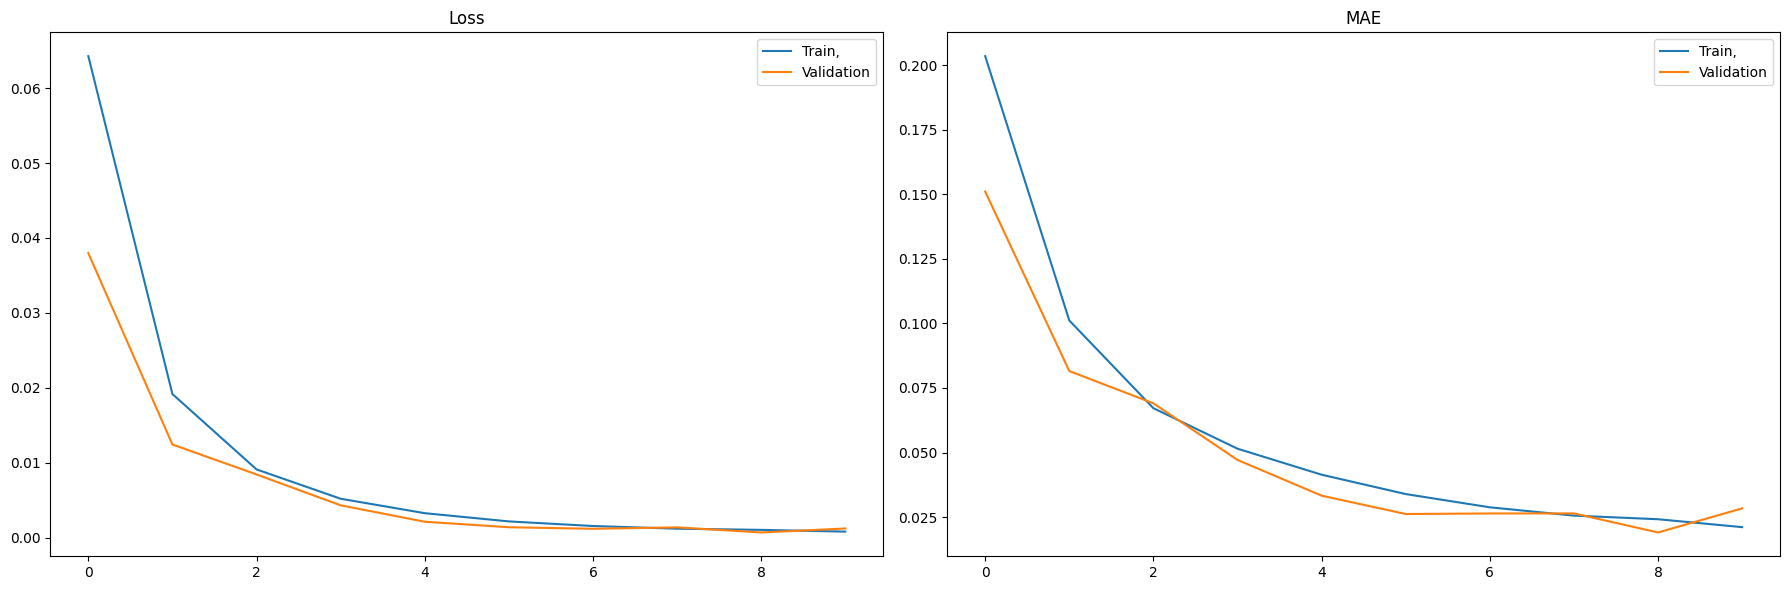

In [9]:
fig, axis = plt.subplots(1, 2, figsize=(18,6))
# trendlines
axis[0].plot(history.history['loss'], label='train t_out_loss')
axis[1].plot(history.history['MAE'], label='val  t_out_loss')
axis[0].plot(history.history['val_loss'], label='train t_out_accuracy')
axis[1].plot(history.history['val_MAE'], label='val t_out_accuracy')

# titles
axis[0].set_title("Loss")
axis[1].set_title("MAE")

# legends
axis[0].legend(['Train,','Validation'])
axis[1].legend(['Train,','Validation'])

plt.tight_layout()
plt.show()

In [10]:
predictions = y_scaler.inverse_transform(model.predict(x_val))

153/153 [==============================] - 1s 3ms/step


In [11]:
# https://kdepy.readthedocs.io/en/latest/examples.html#minimal-working-example-with-options
from KDEpy import FFTKDE
from sklearn.neighbors import KernelDensity
import numpy as np

def SKL_density_plot(data, ax,title='',low_bound=None,up_bound=None, color='black',alpha=1,label='',kernel='gaussian', bw='silverman',linewidth=1):
  
	if low_bound != None and up_bound != None:
		bw = FFTKDE(bw=bw, kernel='gaussian').fit(data.reshape(-1,1)).bw
		kde = KernelDensity(bandwidth=bw, kernel=kernel).fit(data.reshape(-1,1))
		data = np.concatenate((data, 2 * low_bound - data, 2 * up_bound - data))
		kde = KernelDensity(bandwidth=kde.bandwidth_, kernel=kernel).fit(data.reshape(-1,1))
		x = np.linspace(low_bound,up_bound,1000)
		y = np.exp(kde.score_samples(x.reshape(-1,1)))
		plot_y = y[np.where((x>=low_bound) & (x<=up_bound))] # Set the KDE to zero outside of the domain
		plot_x = x[np.where((x>=low_bound) & (x<=up_bound))]  # Set the KDE to zero outside of the domain
		plot_y = np.append(plot_y,[0]) # Set the KDE to zero outside of the domain
		plot_x = np.append(plot_x,[up_bound])  # Set the KDE to zero outside of the domain
		plot_y = np.insert(plot_y,[0],[0]) # Set the KDE to zero outside of the domain
		plot_x = np.insert(plot_x,[0],[low_bound])  # Set the KDE to zero outside of the domain
		plot_y = plot_y * 3  # Double the y-values to get integral of ~1
		ax.plot(plot_x, plot_y, label=label,color=color,alpha=alpha,linewidth=linewidth)
		return x, y, kde
	else:
		kde = KernelDensity(bandwidth=bw, kernel=kernel).fit(data.reshape(-1,1))
		x=np.linspace(data.min(),data.max(),1000)
		y = np.exp(kde.score_samples(x.reshape(-1,1)))
		ax.plot(x, y, label=label,color=color,alpha=alpha)
		return x, y, kde


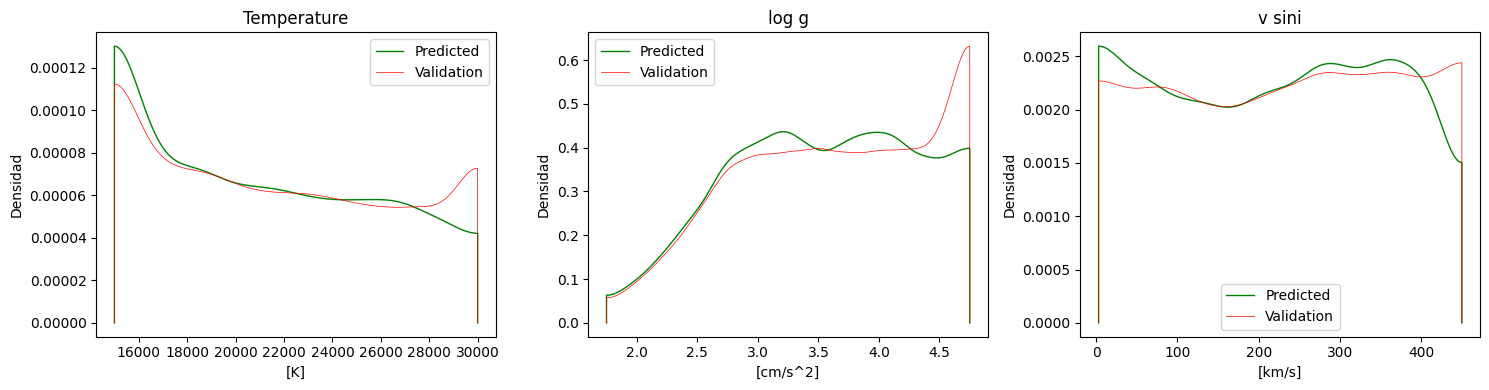

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

original_y_val = y_scaler.inverse_transform(y_val) 

for i, featureName in enumerate(target):
	SKL_density_plot(predictions[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'green',label='Predicted')
	SKL_density_plot(y_scaler.inverse_transform(y_val)[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color='red',linewidth=0.5,label='Validation')
	axes[i].set_title(target[i])
	measure = ['Temperature','log g', 'v sini']
	measure_unit = ['[K]', '[cm/s^2]', '[km/s]']
	axes[i].set_xlabel(measure_unit[i])
	axes[i].set_ylabel('Densidad')
	axes[i].set_title(measure[i])
	axes[i].legend()

plt.legend()
plt.tight_layout();
plt.show()

# 4. Ensemble

In [13]:
from keras.optimizers import Adam
from keras.models import Model

NUM_MODELS = 10
models = [generate_model() for i in range(NUM_MODELS)]
history = []


for i, model in enumerate(models):
	optimizer = Adam()
	model.compile(loss='MAE',optimizer=optimizer)
	history.append(model.fit(x=x_train, y=y_train, epochs=10))

Epoch 1/10
459/459 [==============================] - 5s 9ms/step - loss: 0.1954
Epoch 2/10
459/459 [==============================] - 4s 8ms/step - loss: 0.0940
Epoch 3/10
459/459 [==============================] - 4s 8ms/step - loss: 0.0652
Epoch 4/10
459/459 [==============================] - 4s 8ms/step - loss: 0.0543
Epoch 5/10
459/459 [==============================] - 4s 8ms/step - loss: 0.0466
Epoch 6/10
459/459 [==============================] - 4s 8ms/step - loss: 0.0414
Epoch 7/10
459/459 [==============================] - 4s 8ms/step - loss: 0.0381
Epoch 8/10
459/459 [==============================] - 4s 8ms/step - loss: 0.0338
Epoch 9/10
459/459 [==============================] - 4s 8ms/step - loss: 0.0303
Epoch 10/10
459/459 [==============================] - 4s 8ms/step - loss: 0.0288
Epoch 1/10
459/459 [==============================] - 4s 8ms/step - loss: 0.1835
Epoch 2/10
459/459 [==============================] - 4s 8ms/step - loss: 0.0892
Epoch 3/10
459/459 [=======

In [14]:
predictions = np.array([y_scaler.inverse_transform(model.predict(x_test)) for model in models]) # dim(predictions) = (num_models, num_rows, num_outputs)

153/153 [==============================] - 1s 3ms/step


In [15]:
# guardar predicciones por modelo
#for i,m in enumerate(predictions):
#    f = open('./predictions/m_'+str(i)+'.txt','w')
#    for row in m:
#        for p in row:
#            f.write(str(p)+' ')
#        f.write('\n')
#    f.close()

In [16]:
# leer predicciones por modelo
#NUM_MODELS = 1
#predictions = []
#for i in range(NUM_MODELS):
#  fp = open('predictions/m_'+str(i)+'.txt','r')
#  file = fp.readlines()
#  mPredictios = []
#  for line in file:
#    t, g, v = line.split()
#    mPredictios.append([float(t),float(g),float(v)])
#  predictions.append(mPredictios)
#predictions = np.array(predictions)

In [17]:
# leer modelos
#models = []
#for i in range(NUM_MODELS):
#  model = keras.models.load_model('models/m_'+str(i)+'.h5')
#  models.append(model)

In [18]:
weights = [model.evaluate(x_test, y_test) for model in models]
weights = [weight/sum(weights) for weight in weights]

ensemble_prediction = sum([predictions[i]*weights[i] for i in range(len(models))])
uncertainty = sum([(predictions[i]-ensemble_prediction)**2*weights[i] for i in range(len(models))])


153/153 [==============================] - 1s 3ms/step - loss: 0.0212


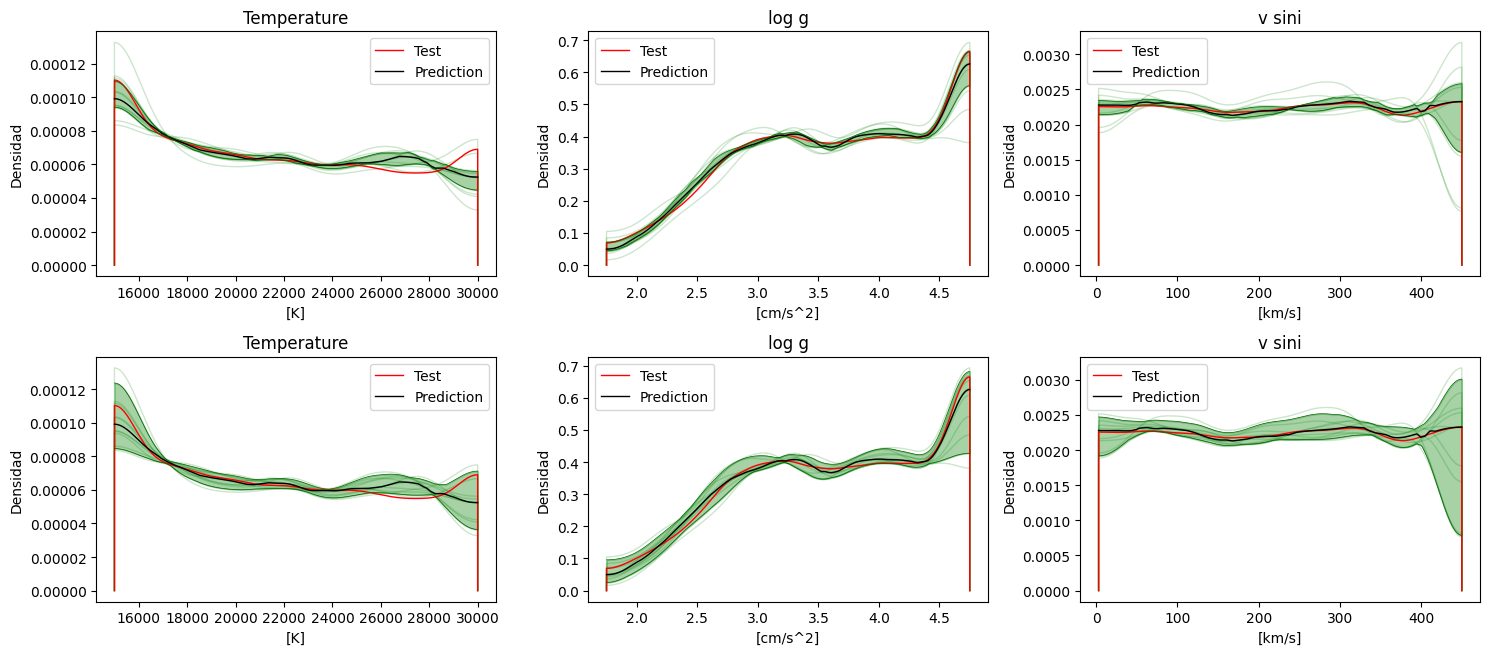

In [19]:
# Ref: https://stackoverflow.com/questions/60130503/plotting-bars-hist-and-pdf-line-via-kdeplot
import scipy.stats as st
from scipy.interpolate import interp1d

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,6.66))

for i, featureName in enumerate(target):
	x_space = np.linspace(Y[featureName].min(), Y[featureName].max(), 2**12)
	heights = []
	for j in range(NUM_MODELS):
		prediction_y = np.array(predictions)[j,:,i] # your data goes here
		x,y,prediction_kde = SKL_density_plot(predictions[j,:,i], axes[0,i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'green',alpha=0.2)
		x,y,prediction_kde = SKL_density_plot(predictions[j,:,i], axes[1,i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'green',alpha=0.2)
		f = interp1d(x, y, kind="linear", assume_sorted=True)
		h = f(x_space)*3
		heights.append(h)
  
	heights = np.array(heights)
 
	rescaled_y = y_scaler.inverse_transform(y_test)[:,i]
	x,y,test_kde = SKL_density_plot(rescaled_y, axes[0,i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'red',label='Test')
	x,y,test_kde = SKL_density_plot(rescaled_y, axes[1,i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'red',label='Test')
	f = interp1d(x, y, kind="linear", assume_sorted=True)
	test_h = f(x_space)
 
	# cuantiles 50% de los datos
	q25 = np.quantile(heights,0.25,axis=0)
	q75 = np.quantile(heights,0.75,axis=0)
	axes[0,i].plot(x_space, np.median(heights,axis=0),color='black',alpha=1,linewidth=1,label='Prediction')
	axes[0,i].plot(x_space, q25,color='darkGreen',alpha=1,linewidth=0.5)
	axes[0,i].plot(x_space, q75,color='darkGreen',alpha=1,linewidth=0.5)
	axes[0,i].fill_between(x_space, q25,q75, alpha=0.35, color='green')
	
	# cuantiles 95% de los datos
	q5 = np.quantile(heights,0.05,axis=0)
	q95 = np.quantile(heights,0.95,axis=0)
	axes[1,i].plot(x_space, np.median(heights,axis=0),color='black',alpha=1,linewidth=1,label='Prediction')
	axes[1,i].plot(x_space, q5,color='darkGreen',alpha=1,linewidth=0.5)
	axes[1,i].plot(x_space, q95,color='darkGreen',alpha=1,linewidth=0.5)
	axes[1,i].fill_between(x_space, q5,q95, alpha=0.35, color='green')
	
	measure = ['Temperature','log g', 'v sini']
	measure_unit = ['[K]', '[cm/s^2]', '[km/s]']
	axes[1,i].set_xlabel(measure_unit[i])
	axes[1,i].set_ylabel('Densidad')
	axes[1,i].legend()
	axes[1,i].set_title(measure[i])

	axes[0,i].set_xlabel(measure_unit[i])
	axes[0,i].set_ylabel('Densidad')
	axes[0,i].legend()
	axes[0,i].set_title(measure[i])


# TODO: utilizar kernel epachevnikov, controlar parametro del ancho de banda
# TODO: intervalos de cuantiles 2,5% a cada lado
plt.tight_layout()
plt.show()

### Bandwidth Tuning

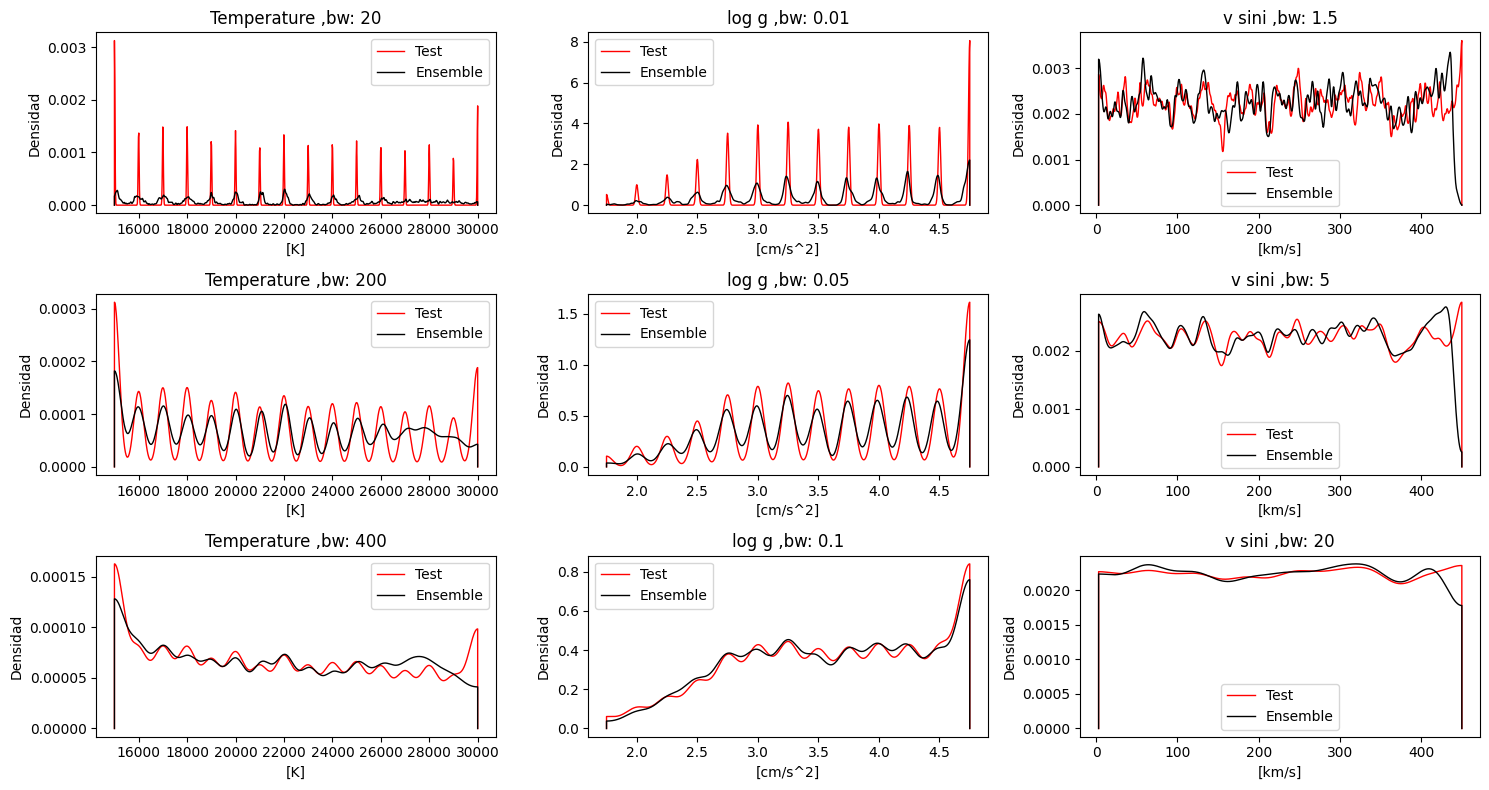

In [20]:
# Ref: https://stackoverflow.com/questions/60130503/plotting-bars-hist-and-pdf-line-via-kdeplot
from scipy.interpolate import interp1d

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,8))
bw1 = [20,0.01,1.5]
bw2 = [200,0.05,5]
bw3 = [400,0.1,20]

for i, featureName in enumerate(target):
	x_space = np.linspace(Y[featureName].min(), Y[featureName].max(), 2**12)
 
	rescaled_y = y_scaler.inverse_transform(y_test)[:,i]
	x,y,test_kde = SKL_density_plot(rescaled_y, axes[0,i], featureName, bw=bw1[i], low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'red',label='Test')
	x,y,test_kde = SKL_density_plot(rescaled_y, axes[1,i], featureName, bw=bw2[i], low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'red',label='Test')
	x,y,test_kde = SKL_density_plot(rescaled_y, axes[2,i], featureName, bw=bw3[i], low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'red',label='Test')
	f = interp1d(x, y, kind="linear", assume_sorted=True)
	test_h = f(x_space)
 
	# ensamble
	x,y,test_kde = SKL_density_plot(ensemble_prediction[:,i], axes[0,i], featureName, bw=bw1[i], low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'black',label='Ensemble')
	x,y,test_kde = SKL_density_plot(ensemble_prediction[:,i], axes[1,i], featureName, bw=bw2[i], low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'black',label='Ensemble')
	x,y,test_kde = SKL_density_plot(ensemble_prediction[:,i], axes[2,i], featureName, bw=bw3[i], low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'black',label='Ensemble')

	measure = ['Temperature','log g', 'v sini']
	measure_unit = ['[K]', '[cm/s^2]', '[km/s]']

	axes[0,i].set_xlabel(measure_unit[i])
	axes[0,i].set_ylabel('Densidad')
	axes[0,i].legend()
	axes[0,i].set_title(measure[i]+' ,bw: '+str(bw1[i]))
 
	axes[1,i].set_xlabel(measure_unit[i])
	axes[1,i].set_ylabel('Densidad')
	axes[1,i].legend()
	axes[1,i].set_title(measure[i]+' ,bw: '+str(bw2[i]))
 
	axes[2,i].set_xlabel(measure_unit[i])
	axes[2,i].set_ylabel('Densidad')
	axes[2,i].legend()
	axes[2,i].set_title(measure[i]+' ,bw: '+str(bw3[i]))


# TODO: utilizar kernel epachevnikov, controlar parametro del ancho de banda
# TODO: intervalos de cuantiles 2,5% a cada lado
plt.tight_layout()
plt.show()

### Bandwidth Tuning with epanechnikov kernel

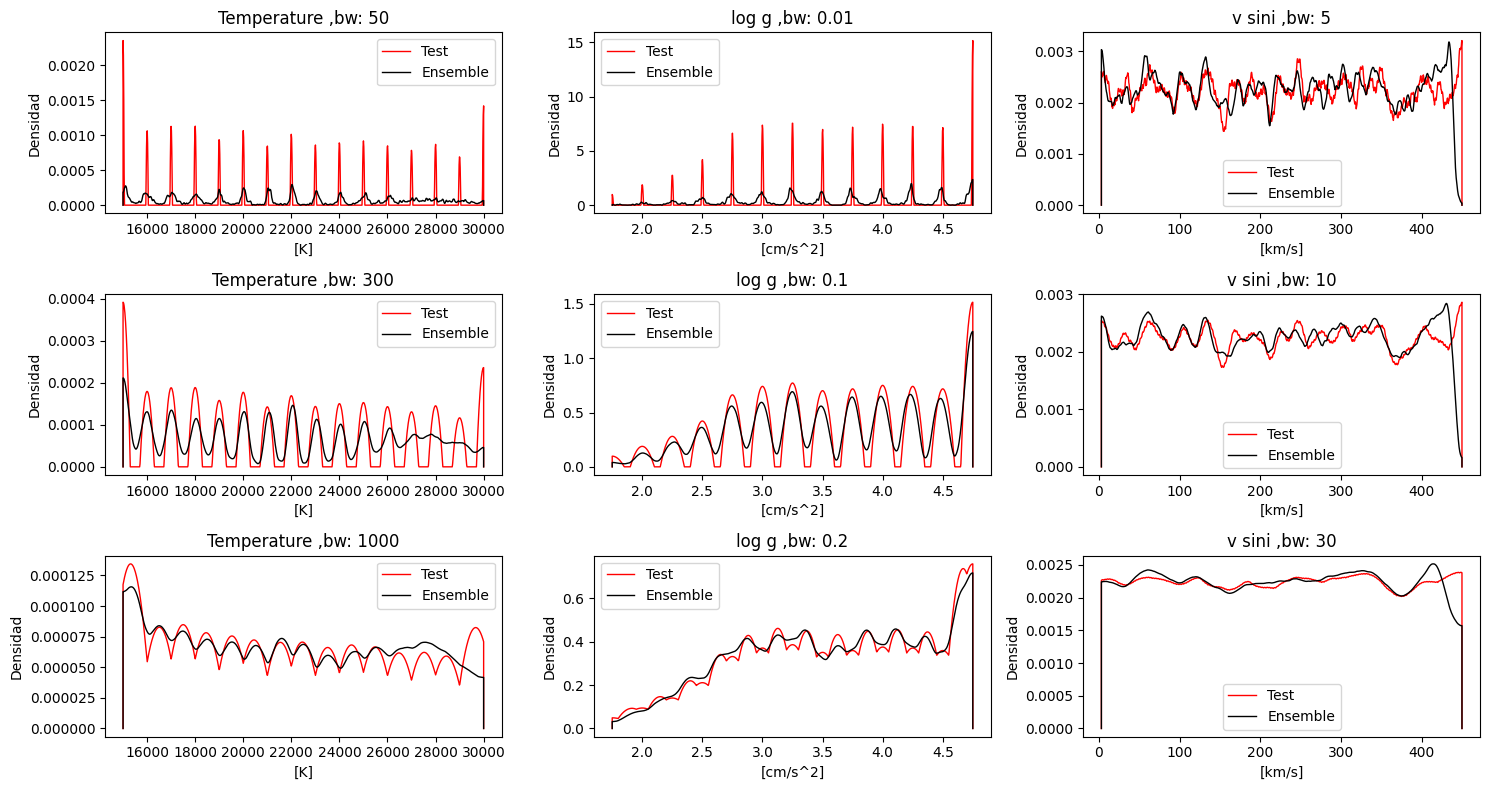

In [21]:
# Ref: https://stackoverflow.com/questions/60130503/plotting-bars-hist-and-pdf-line-via-kdeplot
from scipy.interpolate import interp1d

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,8))
bw1 = [50,0.01,5]
bw2 = [300,0.1,10]
bw3 = [1000,0.2,30]

for i, featureName in enumerate(target):
	x_space = np.linspace(Y[featureName].min(), Y[featureName].max(), 2**12)
 
	rescaled_y = y_scaler.inverse_transform(y_test)[:,i]
	x,y,test_kde = SKL_density_plot(rescaled_y, axes[0,i], featureName,kernel='epanechnikov', bw=bw1[i], low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'red',label='Test')
	x,y,test_kde = SKL_density_plot(rescaled_y, axes[1,i], featureName,kernel='epanechnikov', bw=bw2[i], low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'red',label='Test')
	x,y,test_kde = SKL_density_plot(rescaled_y, axes[2,i], featureName,kernel='epanechnikov', bw=bw3[i], low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'red',label='Test')
	f = interp1d(x, y, kind="linear", assume_sorted=True)
	test_h = f(x_space)
 
	# ensamble
	x,y,test_kde = SKL_density_plot(ensemble_prediction[:,i], axes[0,i], featureName,kernel='epanechnikov', bw=bw1[i], low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'black',label='Ensemble')
	x,y,test_kde = SKL_density_plot(ensemble_prediction[:,i], axes[1,i], featureName,kernel='epanechnikov', bw=bw2[i], low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'black',label='Ensemble')
	x,y,test_kde = SKL_density_plot(ensemble_prediction[:,i], axes[2,i], featureName,kernel='epanechnikov', bw=bw3[i], low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'black',label='Ensemble')

	measure = ['Temperature','log g', 'v sini']
	measure_unit = ['[K]', '[cm/s^2]', '[km/s]']

	axes[0,i].set_xlabel(measure_unit[i])
	axes[0,i].set_ylabel('Densidad')
	axes[0,i].legend()
	axes[0,i].set_title(measure[i]+' ,bw: '+str(bw1[i]))
 
	axes[1,i].set_xlabel(measure_unit[i])
	axes[1,i].set_ylabel('Densidad')
	axes[1,i].legend()
	axes[1,i].set_title(measure[i]+' ,bw: '+str(bw2[i]))
 
	axes[2,i].set_xlabel(measure_unit[i])
	axes[2,i].set_ylabel('Densidad')
	axes[2,i].legend()
	axes[2,i].set_title(measure[i]+' ,bw: '+str(bw3[i]))


# TODO: utilizar kernel epachevnikov, controlar parametro del ancho de banda
# TODO: intervalos de cuantiles 2,5% a cada lado
plt.tight_layout()
plt.show()

# Espectro real

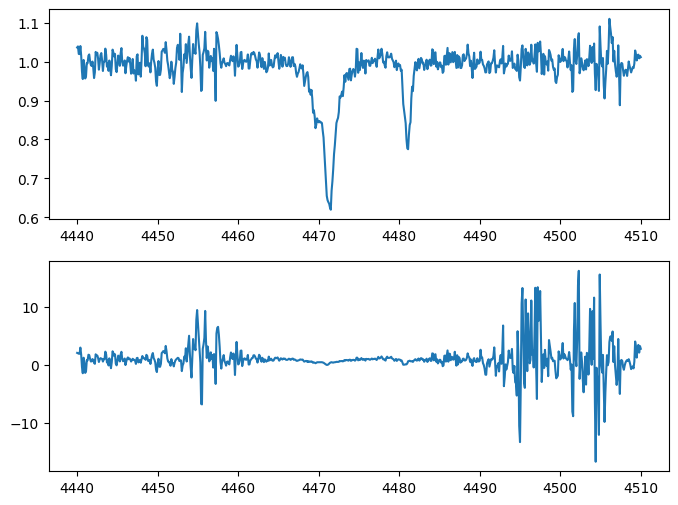

In [52]:
i = 6
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(8,6))
ax[0].plot(X.columns.map(float),X_obs.iloc[i])
ax[1].plot(X.columns.map(float),x_obs[i])

#

In [53]:
predictions = [y_scaler.inverse_transform(model.predict(x_obs)) for model in models]

1/1 [==============================] - 0s 16ms/step


In [54]:
predictions

[array([[ 2.13216211e+04,  9.79203796e+00,  1.56050751e+02],
        [-4.52267285e+03,  1.06401405e+01,  2.88230255e+02],
        [ 2.33654668e+04,  7.33920574e+00,  2.10758163e+02],
        [ 2.96121660e+04,  5.70263577e+00,  3.16453766e+02],
        [ 2.38450840e+04,  6.89203644e+00,  2.36068054e+02],
        [-1.12030439e+04,  1.32383995e+01,  3.43088165e+02],
        [ 1.29993884e+03,  1.05305824e+01,  2.09167725e+02],
        [ 5.33048340e+03,  1.04827909e+01,  1.54968735e+02],
        [ 2.23121133e+04,  8.99399281e+00,  9.80903091e+01]], dtype=float32),
 array([[ 4.8709949e+04,  6.0820065e+00, -8.9143972e+00],
        [ 5.2018289e+04,  6.7849360e+00,  6.9639427e+01],
        [ 4.0130539e+04,  5.7348919e+00, -6.8623781e+00],
        [ 4.0718059e+04,  5.2407360e+00,  5.6890850e+01],
        [ 4.8977324e+04,  5.9755111e+00,  3.0505808e+01],
        [ 4.1937090e+04,  8.8847675e+00,  2.7566638e+02],
        [ 5.7943203e+04,  6.5931320e+00, -1.6475266e+01],
        [ 3.3398711e+04,  7.

In [55]:

ensemble_prediction = sum([predictions[i]*weights[i] for i in range(len(models))])
uncertainty = sum([(predictions[i]-ensemble_prediction)**2*weights[i] for i in range(len(models))])


In [56]:
results = Y_obs.join(pd.DataFrame(ensemble_prediction, columns = ['pred_temperature','pred_g','pred_v']))
results = results.join(pd.DataFrame(uncertainty, columns = ['temperature_unc','g_unc','v_unc']))
results

,temperature,g,v,pred_temperature,pred_g,pred_v,temperature_unc,g_unc,v_unc
0,15000.0,3.40,68.0,54808.851562,7.742282,59.367699,4.611884e+08,4.448799,16296.558594
1,18400.0,3.50,40.0,55829.066406,7.910542,88.409637,9.354490e+08,6.370918,23802.322266
2,30000.0,3.53,150.0,47192.871094,6.881340,33.635391,2.774158e+08,2.200057,8177.219238
3,22000.0,3.90,280.0,51533.761719,6.818087,116.049431,2.192689e+08,2.264939,29767.095703
4,24500.0,3.40,215.0,43138.593750,6.201514,81.247490,1.461570e+08,1.503305,13848.397461
5,22000.0,3.50,180.0,49326.675781,9.234429,127.614380,1.142261e+09,11.991358,58067.546875
6,20000.0,3.56,10.0,52530.160156,8.853645,40.906616,8.582432e+08,6.355473,19360.230469
7,18000.0,3.53,250.0,38677.375000,7.147492,91.469559,4.256660e+08,3.521089,22147.998047
8,26000.0,2.90,300.0,34654.835938,5.916097,72.815117,1.427201e+08,2.252747,4892.799316
